In [2]:
import numpy as np
import matplotlib.pyplot as plt

Plotting the measurements

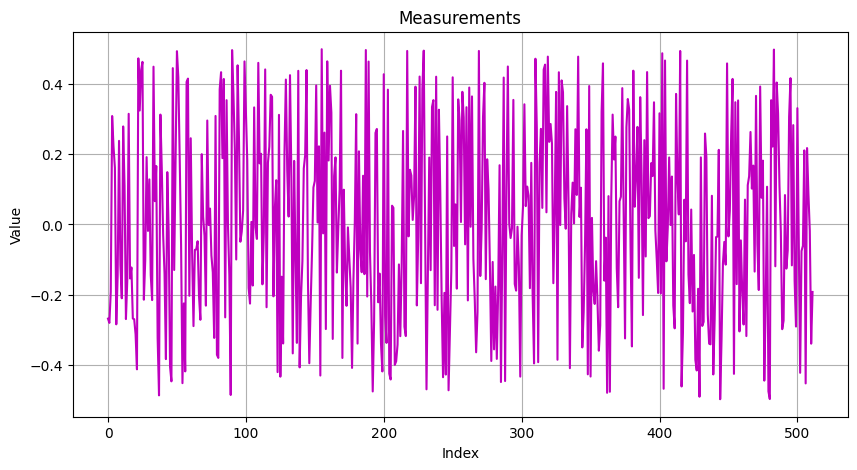

In [3]:
# Read the data from the noise.txt file
data = np.loadtxt("noise.txt")

# Plot the measurements
plt.figure(figsize=(10, 5))
plt.plot(data, linestyle='-', color = 'm')
plt.title('Measurements')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Plotting their DFT

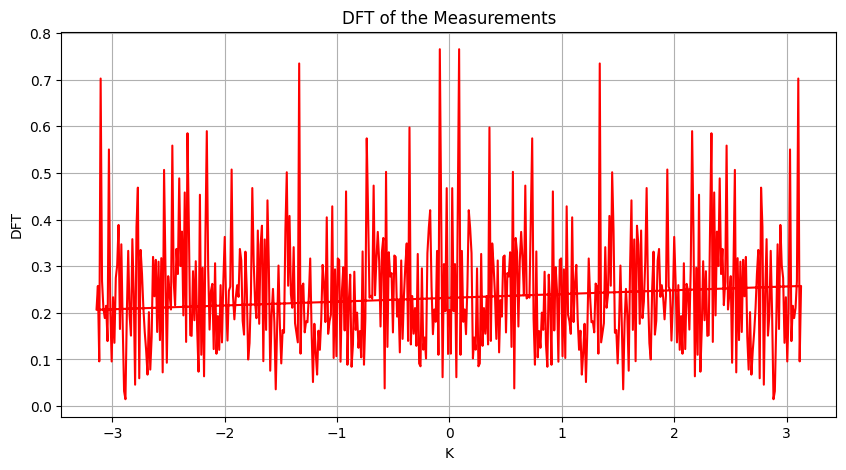

In [4]:
#Compute the Discrete Fourier Transform (DFT)
dft = np.fft.fft(data, norm = 'ortho')

# calculate k values
n = len(data)
dx = 1
karr = (2 * np.pi * np.fft.fftfreq(n, dx))

# Plot the DFT of the measurements
plt.figure(figsize=(10, 5))
plt.plot(karr, np.abs(dft), linestyle='-', color = 'r')
plt.title('DFT of the Measurements')
plt.xlabel('K')
plt.ylabel('DFT')
plt.grid(True)
plt.show()

Computing and plotting the power spectrum

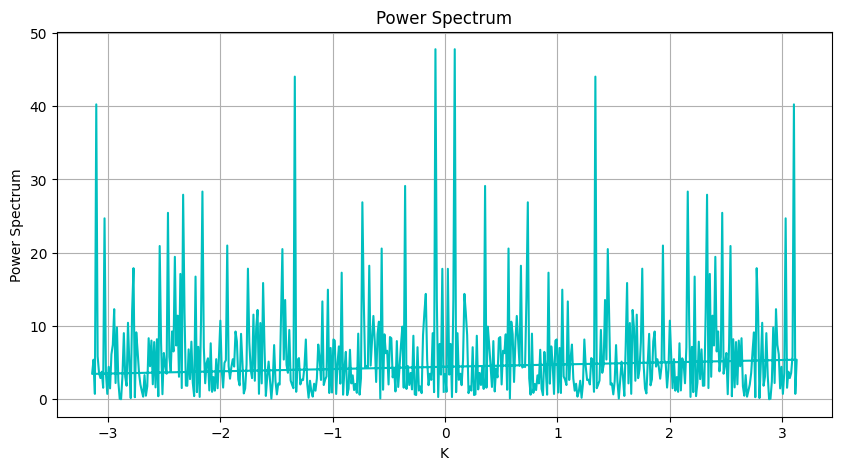

In [5]:
# Calculate Fourier transform 
fkarr =  np.zeros(len(dft), dtype=np.complex128)     # array of F(K)

xmin = 1

for i in range(len(karr)):
    fkarr[i]=dx*np.sqrt(n/(2*np.pi))*np.exp(-(1j)*karr[i]*xmin)*(dft[i])


# Calculate the power spectrum using the periodogram method
power_spectrum = np.abs(fkarr)**2

plt.figure(figsize=(10, 5))
plt.plot(karr, power_spectrum, linestyle='-', color = 'c')
plt.title('Power Spectrum')
plt.xlabel('K')
plt.ylabel('Power Spectrum')
plt.grid(True)
plt.show()

Plotting the binned power spectrum

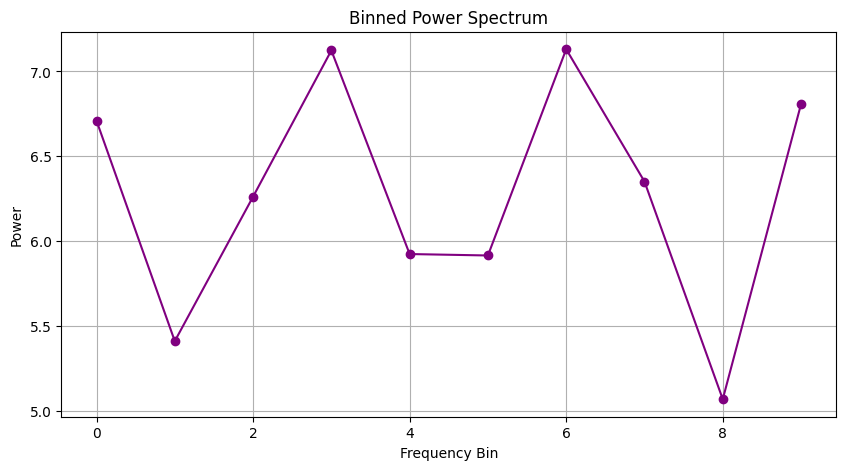

In [6]:
# Step 5: Bin the power spectrum into ten bins
num_bins = 10
bin_size = len(power_spectrum) // num_bins
binned_power_spectrum = [np.mean(power_spectrum[i*bin_size:(i+1)*bin_size]) for i in range(num_bins)]

# Step 6: Plot the binned power spectrum
plt.figure(figsize=(10, 5))
plt.plot(binned_power_spectrum, marker='o', linestyle='-', color = 'purple')
plt.title('Binned Power Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Power')
plt.grid(True)
plt.show()

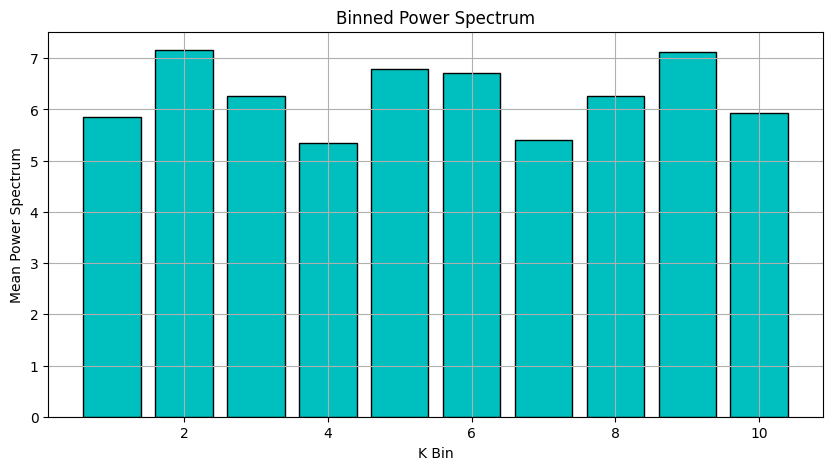

In [7]:
num_bins = 10
bin_edges = np.linspace(np.min(karr), np.max(karr), num_bins + 1)
bin_indices = np.digitize(karr, bin_edges)
binned_power_spectrum = np.zeros(num_bins)

for i in range(num_bins):
    indices_in_bin = np.where(bin_indices == i+1)[0]
    binned_power_spectrum[i] = np.mean(power_spectrum[indices_in_bin])

# Plotting the binned power spectrum
plt.figure(figsize=(10, 5))
plt.bar(range(1, num_bins + 1), binned_power_spectrum, color = 'c', edgecolor = 'k')
plt.title("Binned Power Spectrum")
plt.xlabel('K Bin')
plt.ylabel ('Mean Power Spectrum')
plt.grid(True)
plt.show()